# Image Classification with CNN

## Project Overview

### About Convolutional Neural Network

Convolutional Neural Network (CNN) is an advanced version of artificial neural networks (ANNs), primarily designed to extract features from grid-like matrix datasets. This is particularly useful for visual datasets such as images or videos, where data patterns play a crucial role. CNNs are widely used in computer vision applications due to their effectiveness in processing visual data.

CNNs consist of multiple layers like the input layer, Convolutional layer, pooling layer, and fully connected layers.

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20231218174301/max.png' >

Image Credit: [geeksforgeeks](https://www.geeksforgeeks.org/machine-learning/introduction-convolution-neural-network/)

### Objective

To build a Convolutional Neural Network to classify handwritten digits from the MNIST dataset with high accuracy.

### Dataset description

MNIST:

- 70,000 grayscale images (28x28 pixels) of handwritten digits (0 to 9)
- 60,000 for training, 10,000 for testing

#### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#to avoid warnings popping up, i'd like to keep a clean presentation
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Data Exploration & Preprocessing

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


#### Visualizing sample images

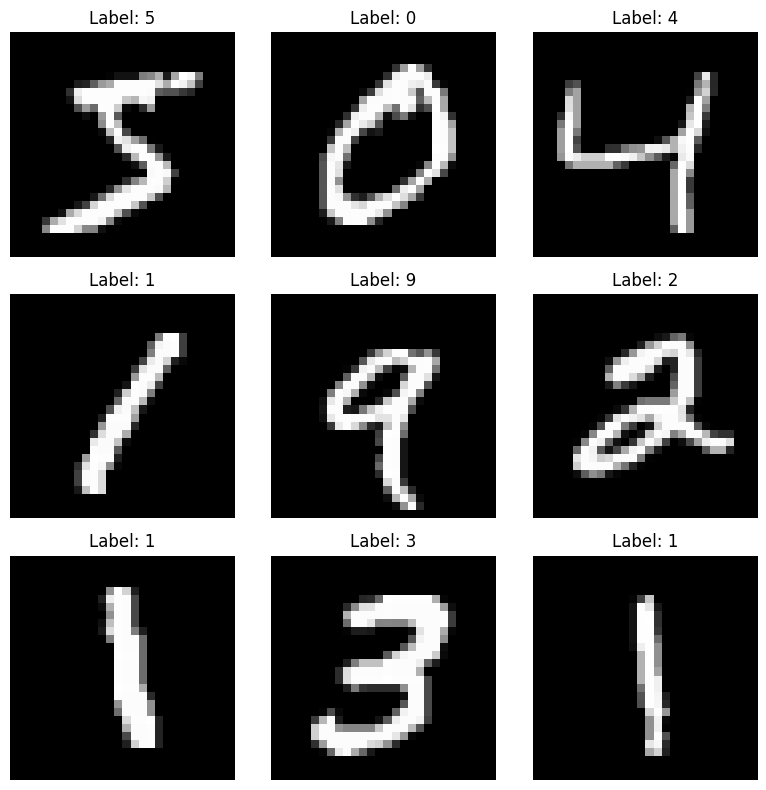

In [4]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Class Distribution

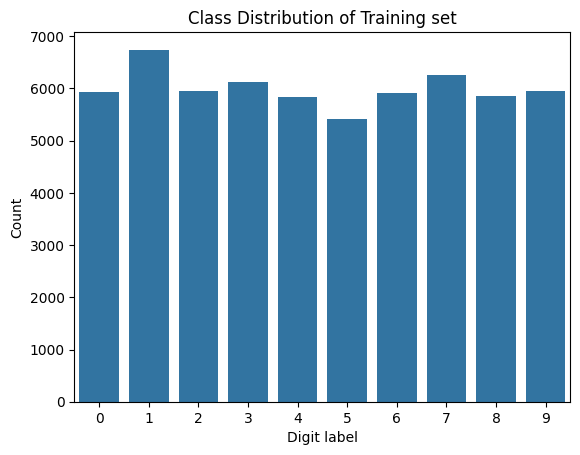

In [5]:
sns.countplot(x=y_train)
plt.title('Class Distribution of Training set')
plt.xlabel('Digit label')
plt.ylabel('Count')
plt.show()

#### Normalizing Images

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255 #normalizing the pixel values between 0 and 1

In [7]:
X_train.shape

(60000, 28, 28, 1)

We have to change the input dimensions, since our data is 28 x 28 pixel images, and the 1 at the end means black and white color scheme, if it were rgb we would have used 3.

#### Encoding Y

In [8]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Our Model expects the y (Target) to be onehotencoded array.

## Model Building & Training

We are going to build a CNN, first we initate the Sequential model.

In [9]:
model = Sequential()

We are adding the first 2D Convolutional layer with 32 filters, with Rectified Linear Unit (relu) as our activation function. </br>
Then we add BatchNormalization to fasten our convergence (by reducing covariate shift). </br>
MaxPooling2D to reduce the dimensions, while preserving the most important features.

In [10]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

Another Convolutional layer with 64 filters, other paramters are same as before, but with added Dropout to avoid overfitting in this model.

In [11]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

We flatten the mutlidimensional output from the preceding layers to a one dimension vector, which can be passed through the Dense layers. </br>
Then the dense layer learns the complex relationships between features to produce a final output.

In [12]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Finally, we compile the model with the Adam optimizer to adjust the model's parameters to minimize the loss function.

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We fit the model with Training data, with 10 epochs.

In [14]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.8351 - loss: 0.5824 - val_accuracy: 0.9811 - val_loss: 0.0671
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9655 - loss: 0.1162 - val_accuracy: 0.9846 - val_loss: 0.0505
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9745 - loss: 0.0873 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9788 - loss: 0.0706 - val_accuracy: 0.9895 - val_loss: 0.0399
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9793 - loss: 0.0669 - val_accuracy: 0.9891 - val_loss: 0.0409
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9843 - loss: 0.0542 - val_accuracy: 0.9905 - val_loss: 0.0392
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.9905 - val_loss: 0.0389
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9857 - loss: 0.0454 - 

## Evaluation

The model performed well in training set. </br>
Now let us do the test set.

In [15]:
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0260, Test Accuracy: 0.9923


The model gave a stellar performance in test set too.

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Let us map the Confusion Matrix.

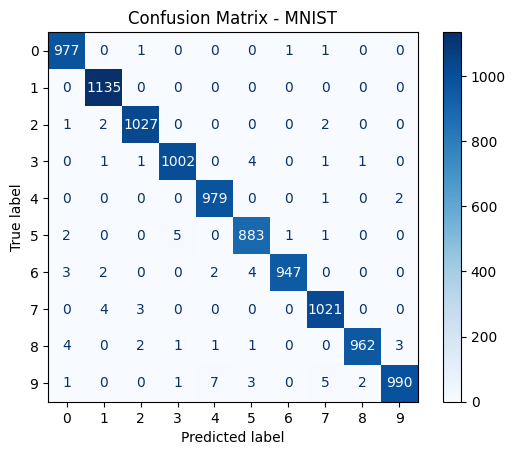

In [18]:
conf_mat = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - MNIST')
plt.show()

Plotting Accuracy with Epochs

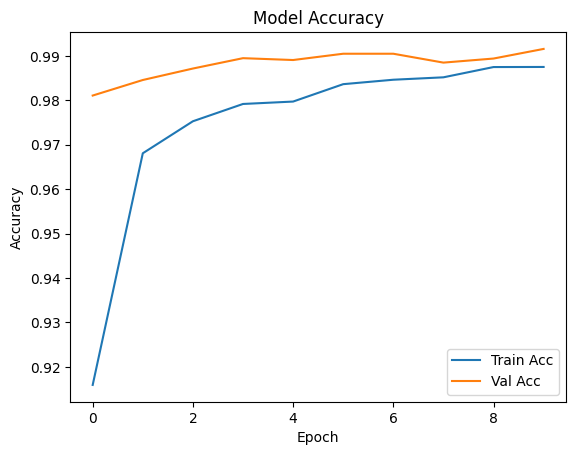

In [19]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Conclusion

We successfully built a CNN that classifies handwritten digits with high accuracy (>98%). CNNs are well-suited for visual recognition tasks and performed significantly better than fully connected networks in this scenario.